In [88]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import io
from skimage.io import imread, imshow, show
from datetime import datetime
import pandas as pd


#В таблице не все цвета, поэтому функция снизу нужна для того, чтобы определить индекс ближайшего цвета, к нашему
X = pd.read_csv("D:/Users/Загрузки/test1.csv")
X

,r,g,b,r_new,g_new,b_new
0,0,0,0,0,0,0
1,0,0,16,0,0,22
2,0,0,32,0,35,44
3,0,0,48,0,35,66
4,0,0,64,0,35,87
...,...,...,...,...,...,...
4091,240,240,176,241,227,180
4092,240,240,192,243,230,188
4093,240,240,208,238,231,204
4094,240,240,224,238,231,222


In [89]:
def foo(default, X):
    tmp1 = default[2] // 16
    tmp2 = default[1] // 16
    tmp3 = default[0] // 16
    indx = tmp1 + 16 * tmp2 + 16*16*tmp3
    return np.array(X.iloc[indx, 3:])
    

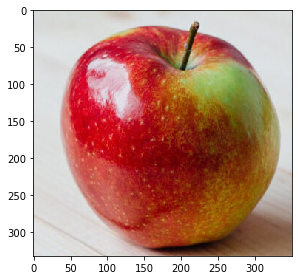

(333, 350, 3)

In [90]:
to_transform = imread("D:/Users/Загрузки/different-types-color-blindness-photos-53-58873353c4381__880(1).jpg")
io.imshow(to_transform)
io.show()
to_transform.shape

Циклами проходим по всем пикселям изображения и меняем его цвет, в соответствии с таблицей

In [91]:
print(datetime.now()) 
cache = {}
hits = 0
for i in range(to_transform.shape[0]):
    for j in range(to_transform.shape[1]):
        curr = to_transform[i][j]
        ct = tuple(curr)
        ct = tuple(map(int, ct))
        if ct in cache:
            hits += 1
            to_transform[i][j] = cache[ct]
        else:
            res = foo(to_transform[i][j], X)
            to_transform[i][j] = res
            cache[ct] = res
print(hits)
print(datetime.now()) 

2021-09-09 00:40:20.713862
56461
2021-09-09 00:40:29.024279


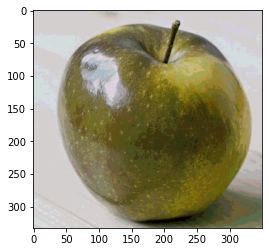

In [92]:
plt.imshow(to_transform)
plt.show()

In [82]:
io.imsave("D:/Users/Загрузки/nis/ozon1.jpg", to_transform)